# Convolutional Neural Network

### Importing the libraries

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [232]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## Part 1 - Data Preprocessing

### Getting the train and test set

In [233]:
# Loader params
batch_size = 32
img_height = 140
img_width = 140
train_data_dir = "./dataset/training_set/"
test_data_dir = "./dataset/test_set/"

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  subset=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  subset=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Configure data to performance

In [234]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Part 2 - Building the CNN

### Creating a data augmentation layer

In [235]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Creating the model

In [236]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
    
  layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[img_width, img_height, 3]),
  layers.MaxPool2D(pool_size=2, strides=2),
    
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.MaxPool2D(pool_size=2, strides=2),
    
  layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
  layers.MaxPool2D(pool_size=2, strides=2),
    
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=1, activation='sigmoid')
])

### Compiling the model

In [237]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### Model summary

In [238]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_26 (Sequential)  (None, 140, 140, 3)       0         
                                                                 
 rescaling_21 (Rescaling)    (None, 140, 140, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 138, 138, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 69, 69, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 67, 67, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 33, 33, 32)       0         
 g2D)                                                

## Part 3 - Training the CNN

### Training the CNN

In [239]:
history = model.fit(
  x=train_ds,
  validation_data=test_ds,
  epochs=25
)

Epoch 1/25
250/250 [==============================] - 100s 336ms/step - loss: 0.6574 - accuracy: 0.5929 - val_loss: 0.6120 - val_accuracy: 0.6760
Epoch 2/25
250/250 [==============================] - 79s 316ms/step - loss: 0.5975 - accuracy: 0.6785 - val_loss: 0.5750 - val_accuracy: 0.6970
Epoch 3/25
250/250 [==============================] - 72s 289ms/step - loss: 0.5516 - accuracy: 0.7190 - val_loss: 0.5274 - val_accuracy: 0.7390
Epoch 4/25
250/250 [==============================] - 74s 292ms/step - loss: 0.5235 - accuracy: 0.7362 - val_loss: 0.5066 - val_accuracy: 0.7540
Epoch 5/25
250/250 [==============================] - 75s 300ms/step - loss: 0.5026 - accuracy: 0.7556 - val_loss: 0.4907 - val_accuracy: 0.7565
Epoch 6/25
250/250 [==============================] - 77s 308ms/step - loss: 0.4837 - accuracy: 0.7666 - val_loss: 0.4726 - val_accuracy: 0.7745
Epoch 7/25
250/250 [==============================] - 78s 312ms/step - loss: 0.4645 - accuracy: 0.7760 - val_loss: 0.4618 - val_a

### Visualizing the training results

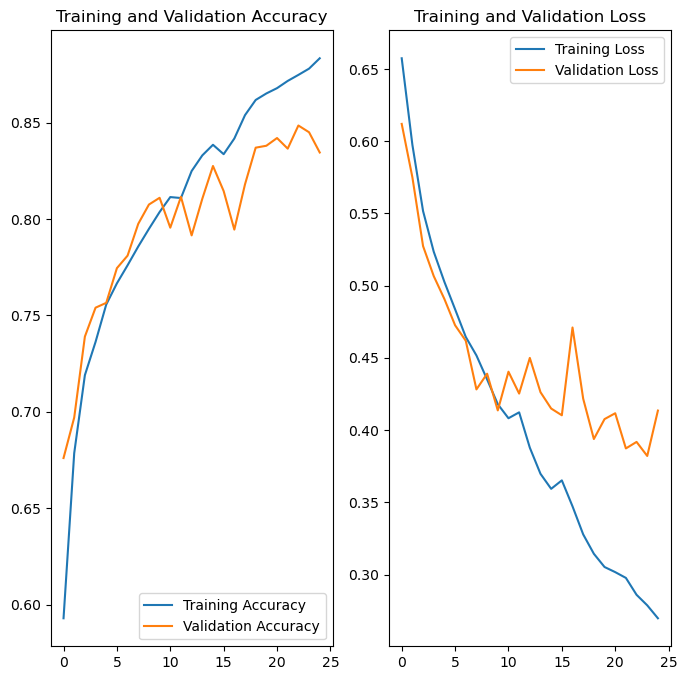

In [240]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predicting a new result

1/1 [==============================] - 0s 54ms/step
Belongs to the class 'dogs' with 100.0% confidence.


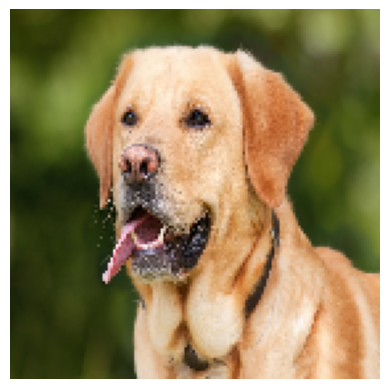

In [278]:
img_prev = tf.keras.utils.load_img(
    "./dataset/single_prediction/cat_or_dog_1.jpg", target_size=(img_height, img_width)
)
img = tf.keras.utils.img_to_array(img_prev)
img = np.expand_dims(img, axis=0) # Create a batch

result = model.predict(img)[0][0]

print(f"Belongs to the class '{class_names[round(result)]}' with {round((100*result if round(result) else 100*(1-result)), 2)}% confidence.")

plt.imshow(img_prev)
plt.axis("off")
plt.show()